In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Description de la base de donnees
### - customerID : Contient les ID des clients

### - gender : Contient le genre (Sexe) du clients


### - SeniorCitizen : Whether the customer is a senior citizen or not (1, 0), Si le client est une personne age ou non

### - Partner : Whether the customer has a partner or not(Yes, No), Si le client est une personne age ou non

### - Dependents : Whether the customer has dependents or not (Yes, No), Si le Le client a des personnes à charge (Oui, Non)

### - tenure : Number of months the customer has stayed with the company, Nombre de mois que le client est reste avec la compagnie

### - PhoneService : Whether the customer has a phone service or not (Yes, No), Si le client a un numero de service ou pas.

### - MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service), Le client dispose de plusieurs lignes (Oui, Non, Pas de service téléphonique)

### - InternetService : Customer’s internet service provider (DSL, Fiber optic, No), Fournisseur d'accès à Internet du client (DSL, Fibre optique, Aucun)

### - OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service), Le client dispose-t-il d'une sécurité en ligne ? (Oui, Non, Pas d'accès Internet)

### - OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service), Le client dispose-t-il d'une sauvegarde en ligne ? (Oui, Non, Pas d'accès Internet)

### - DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service), Le client dispose-t-il d'une protection des appareils ? (Oui, Non, Pas d'accès Internet)

### - TechSupport : Whether the customer has tech support or not (Yes, No, No internet service), Le client dispose-t-il d'un support technique ? (Oui, Non, Pas d'accès Internet)

### - StreamingTV  : Whether the customer has streaming TV or not (Yes, No, No internet service), Le client dispose-t-il de la télévision en streaming ? (Oui, Non, Pas d'accès Internet)

### - StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service), Le client dispose-t-il d'un service de streaming de films ? (Oui, Non, Pas d'accès Internet)

### - Contract : The contract term of the customer (Month-to-month, One year, Two year), Durée d'engagement du client (Sans engagement / Mensuel, Un an, Deux ans)

### - PaperlessBilling : Whether the customer has paperless billing or not (Yes, No), Le client a-t-il opté pour la facturation électronique ? (Oui, Non)

### - PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card, Mode de paiement du client (Chèque électronique, Chèque postal, Prélèvement automatique, Carte de crédit)

### - MonthlyCharges : The amount charged to the customer monthly, Montant facturé mensuellement au client

### - TotalCharges : The total amount charged to the customer, Montant total facturé au client

### - Churn : Whether the customer churned or not (Yes or No), Le client a-t-il résilié son contrat ? (Oui, Non)

In [2]:
#Ouverture de la base de donnees
df = pd.read_csv("..\\data\\WA_Fn-UseC_-Telco-Customer-Churn 2.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Forme du dataset 
df.shape

(7043, 21)

In [5]:
#Informations du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
#Types des caracteristiques
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Presence de valeurs manquantes
df.isnull().sum()
#il n'y a pas de valeurs manquantes

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Presence de doublons
df.duplicated().sum()

0

In [10]:
#Suppression des doublons
df.drop_duplicates(inplace = True)

In [11]:
#Presence de doublons
df.duplicated().sum()

0

In [12]:
df.shape

(7043, 21)

In [13]:
#Suppression de la colonne custumerID
df.drop("customerID", axis = 1, inplace = True)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
----------------------------------------------------------------------------------------------------
valeurs uniques sur la colonne <<gender>>
['Female' 'Male'] 

----------------------------------------------------------------------------------------------------
valeurs uniques sur la colonne <<Partner>>
['Yes' 'No'] 

----------------------------------------------------------------------------------------------------
valeurs uniques sur la colonne <<Dependents>>
['No' 'Yes'] 

----------------------------------------------------------------------------------------------------
valeurs uniques sur la colonne <<PhoneService>>
['No' 'Yes'] 

----------------------------------------------------------------------------------------------------
va

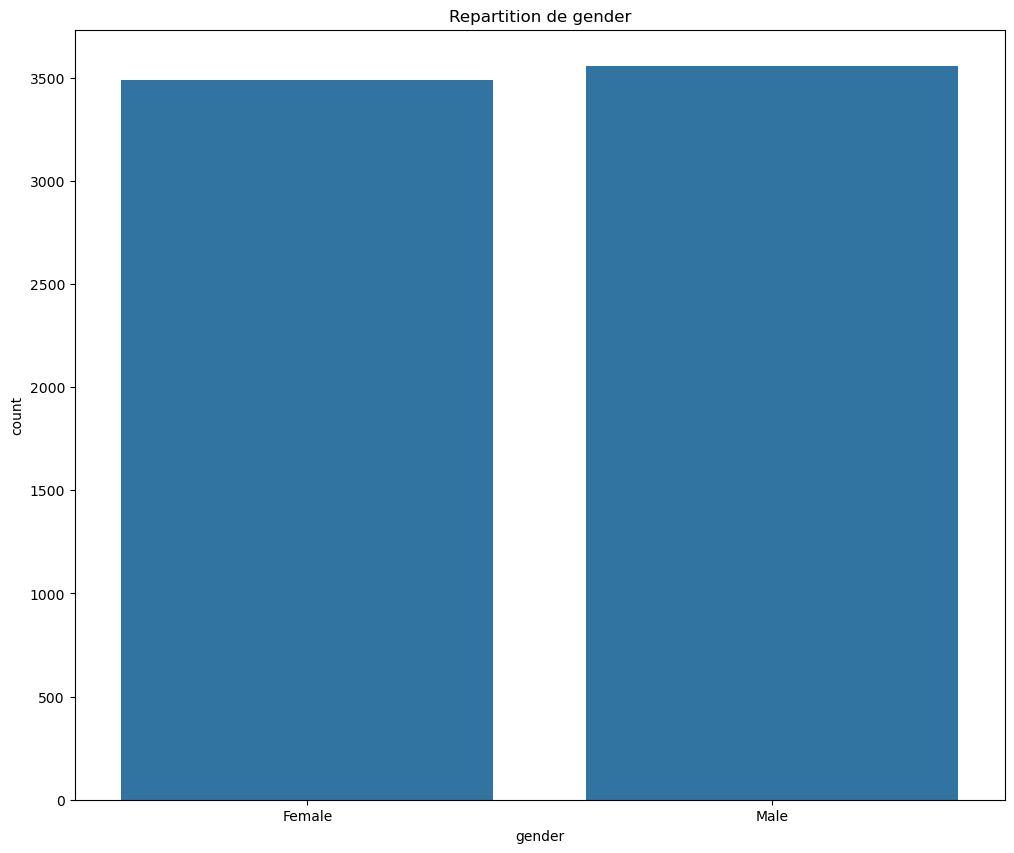

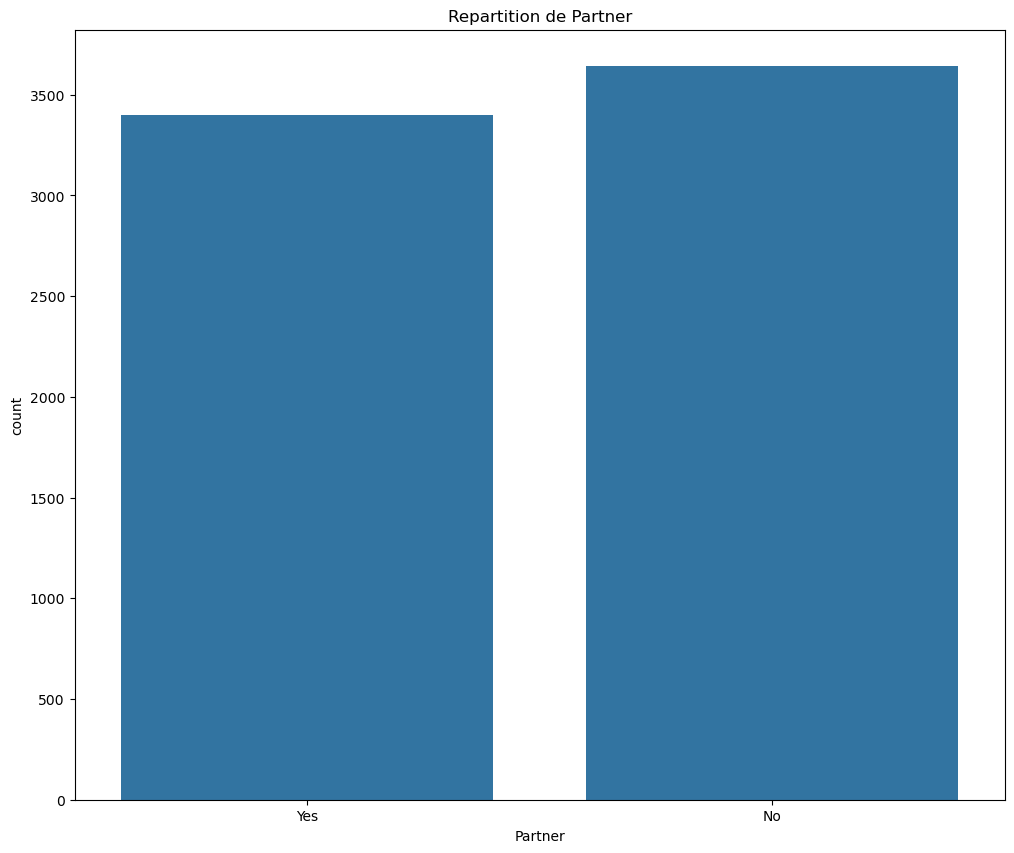

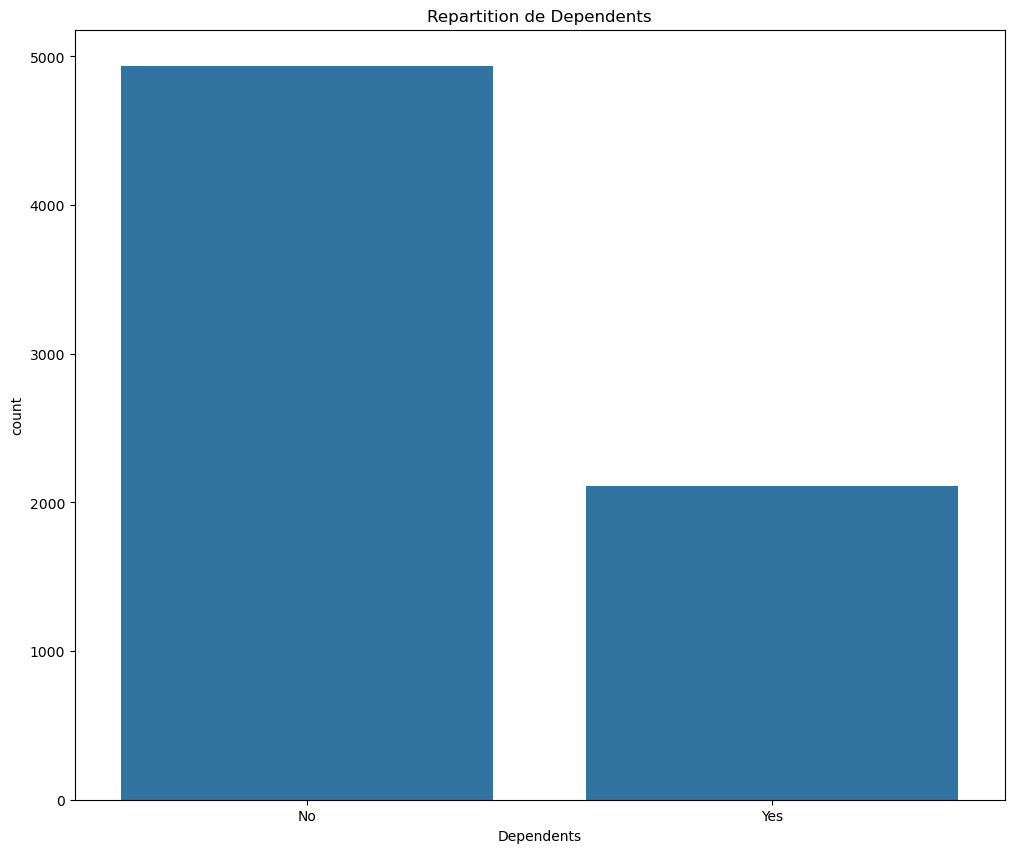

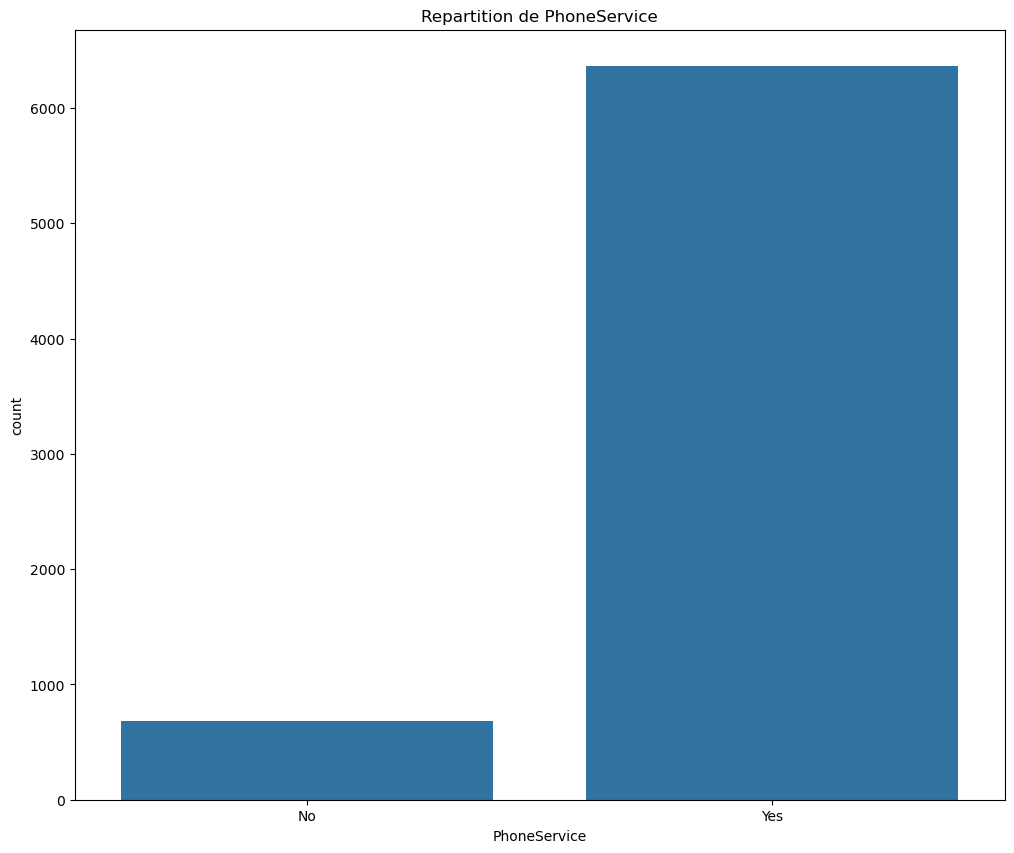

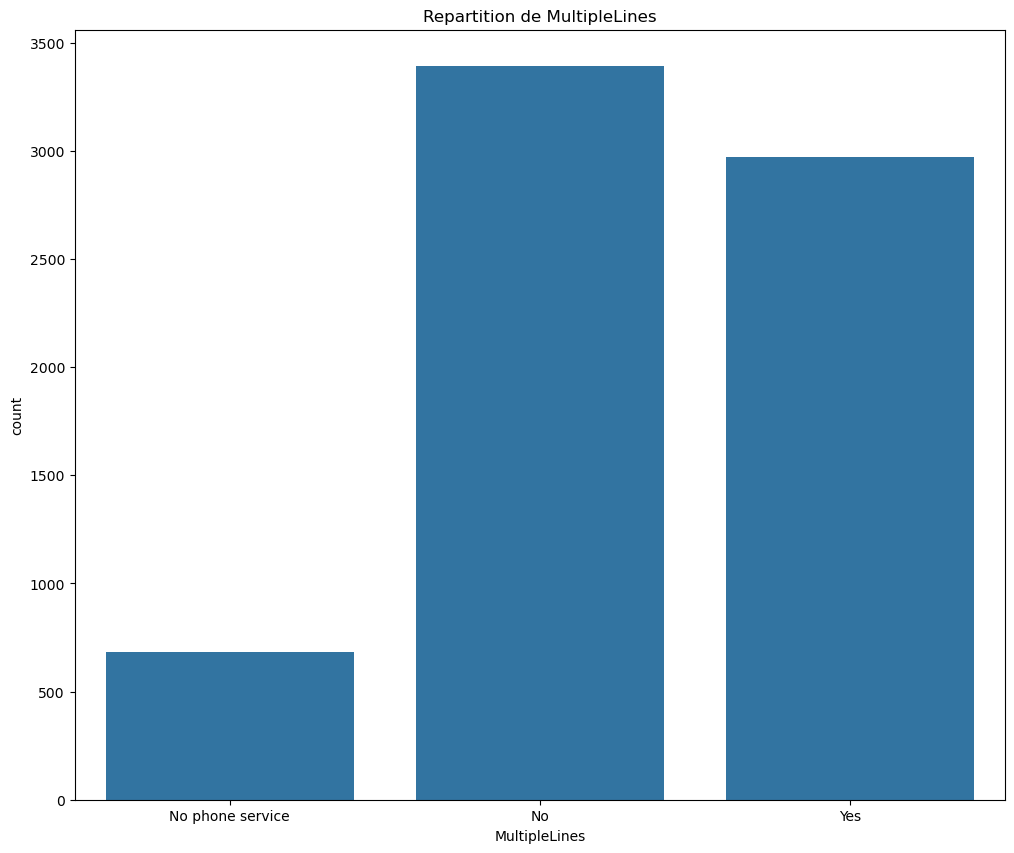

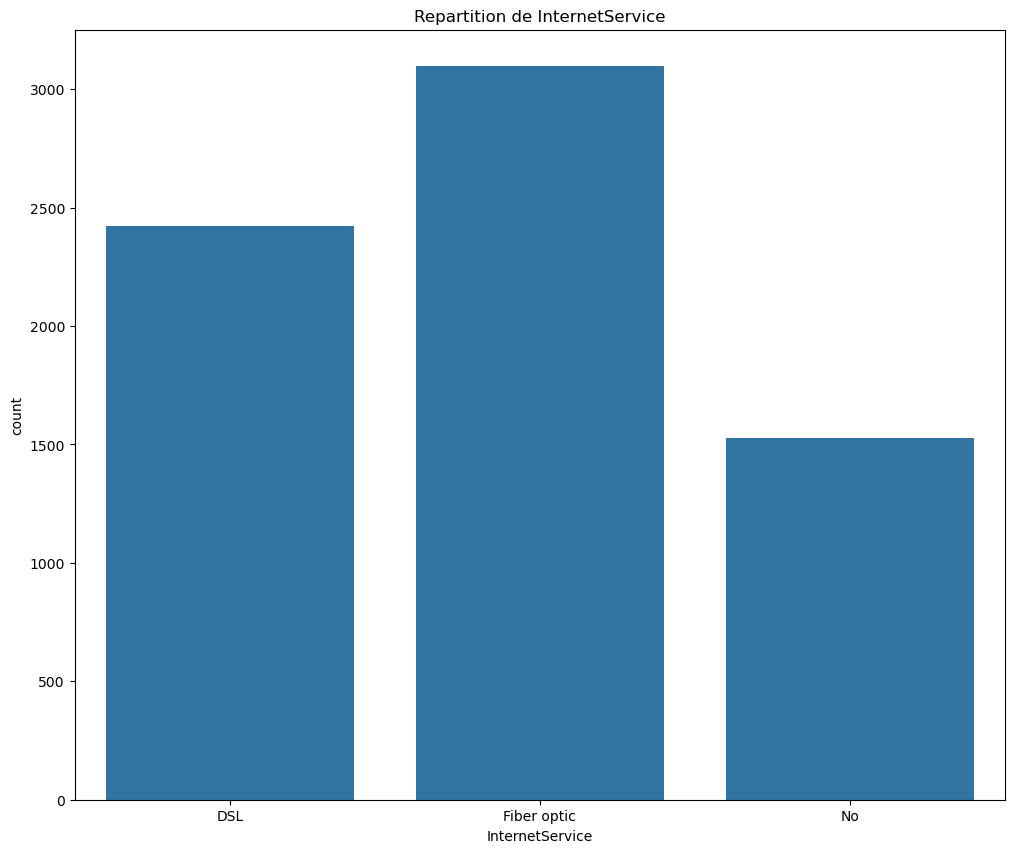

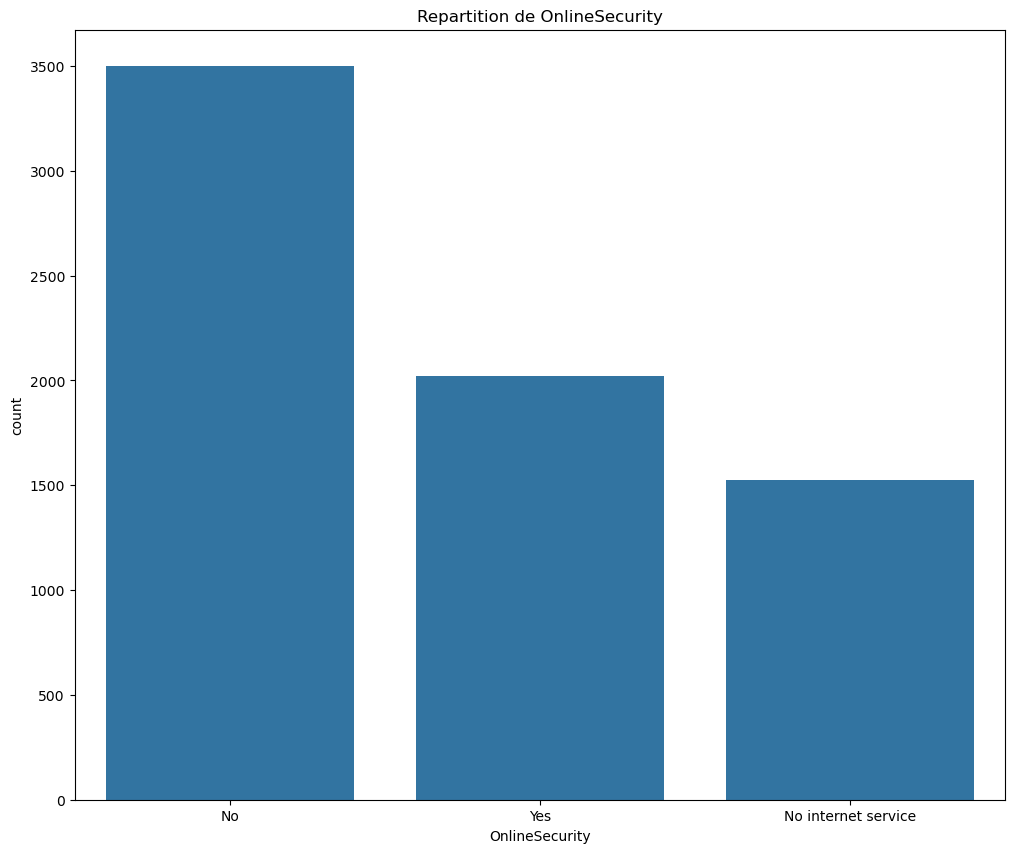

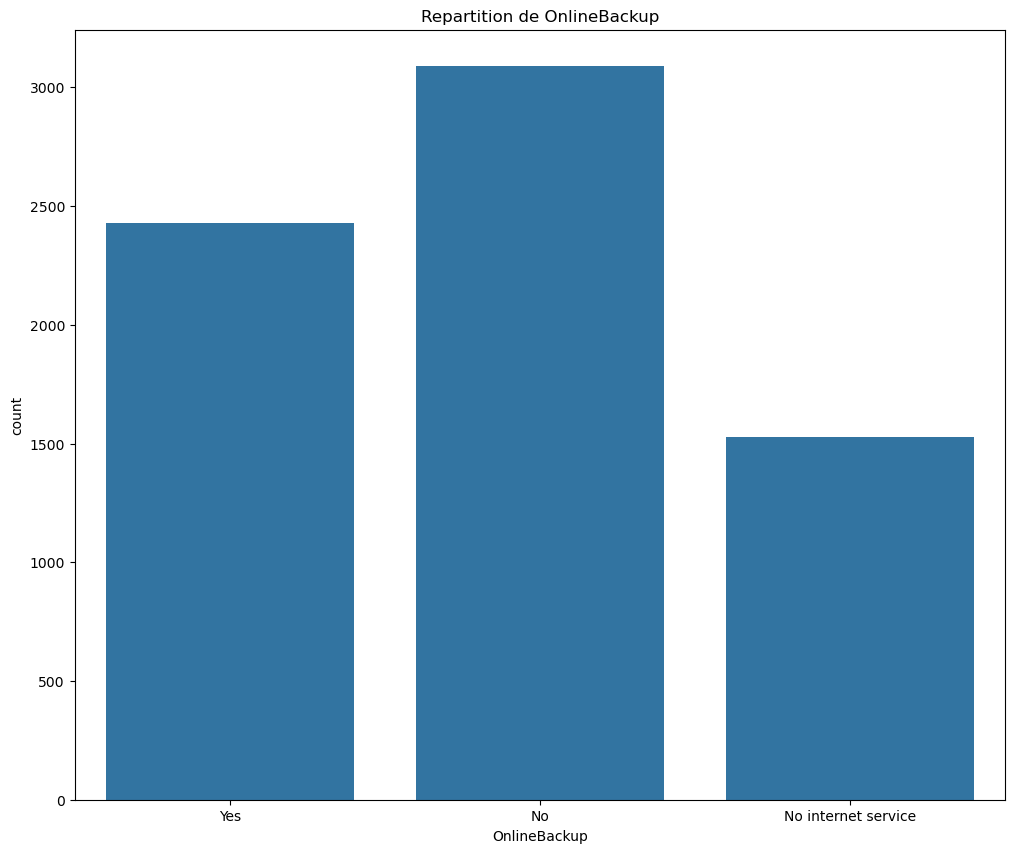

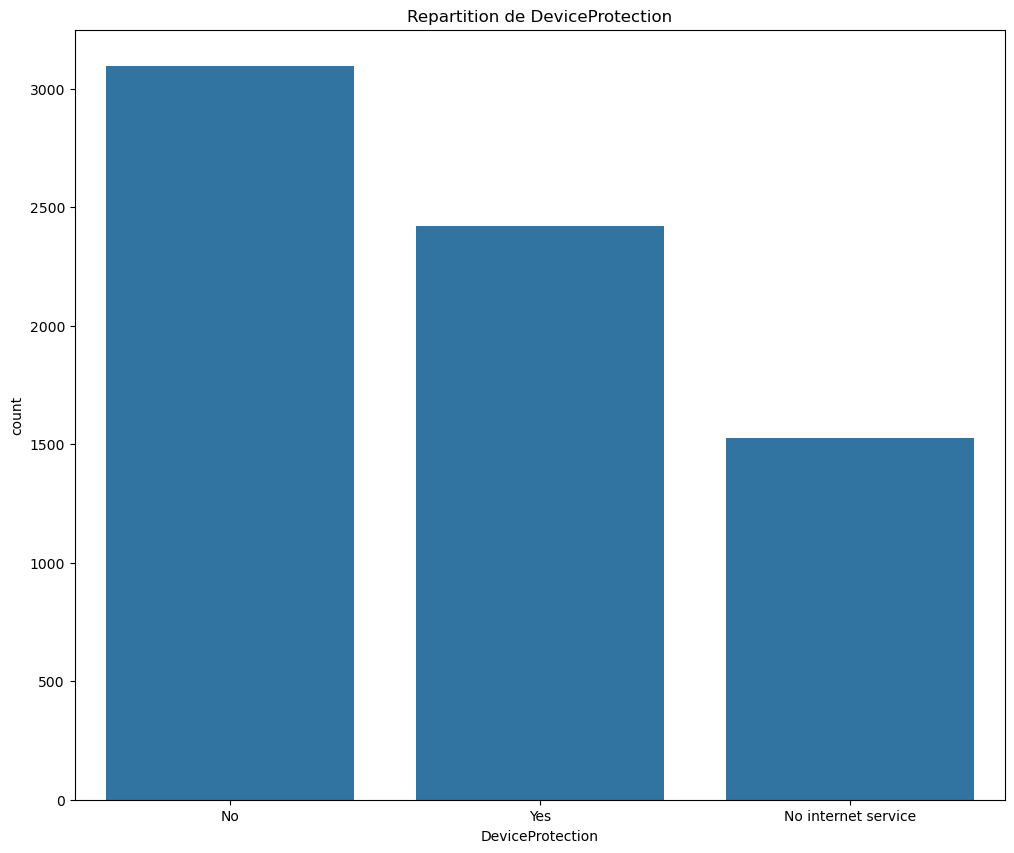

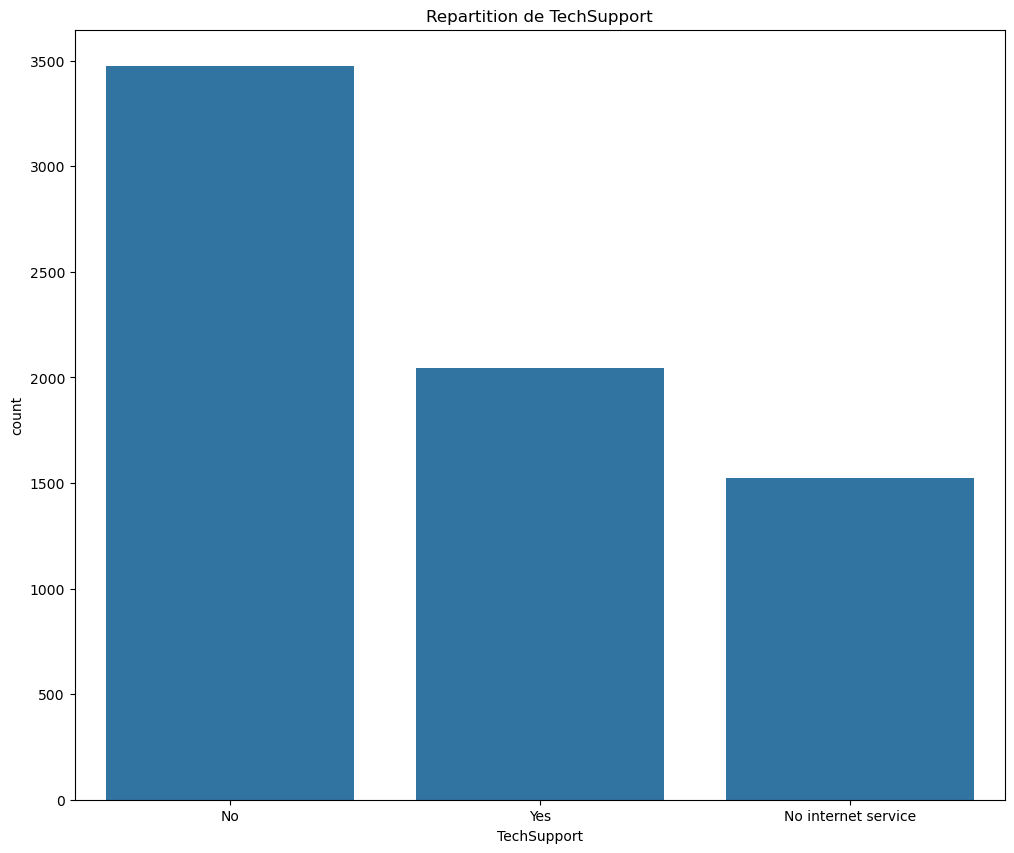

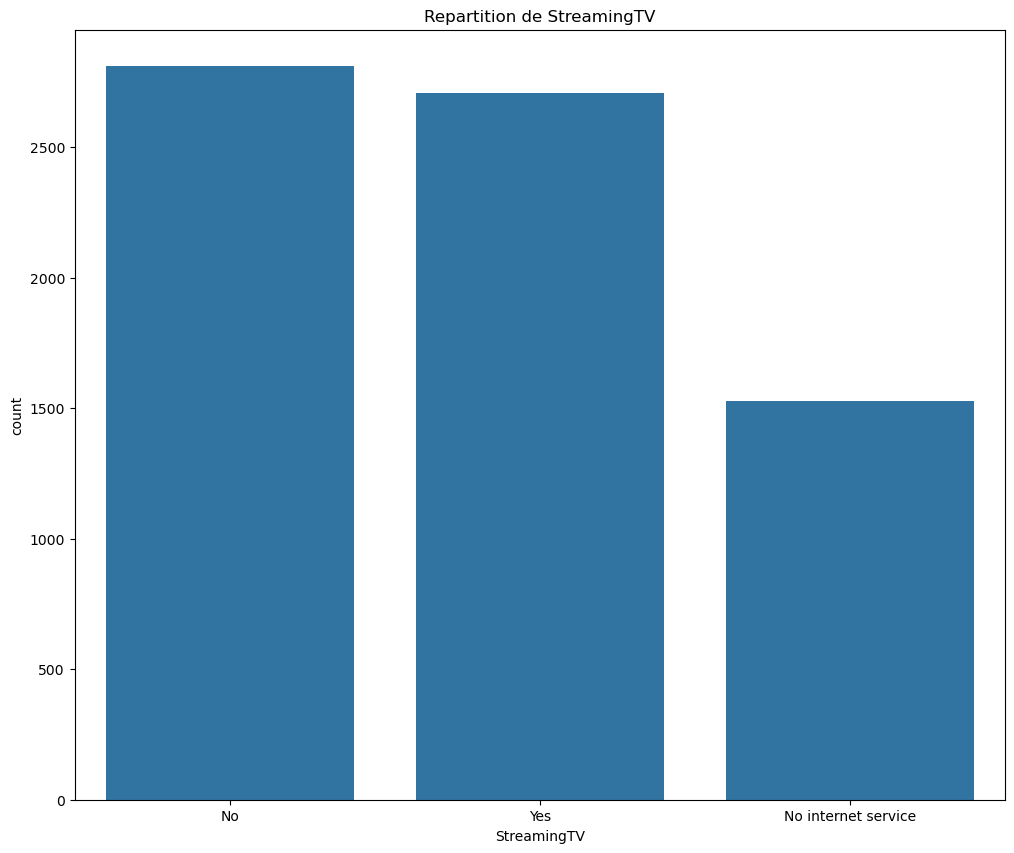

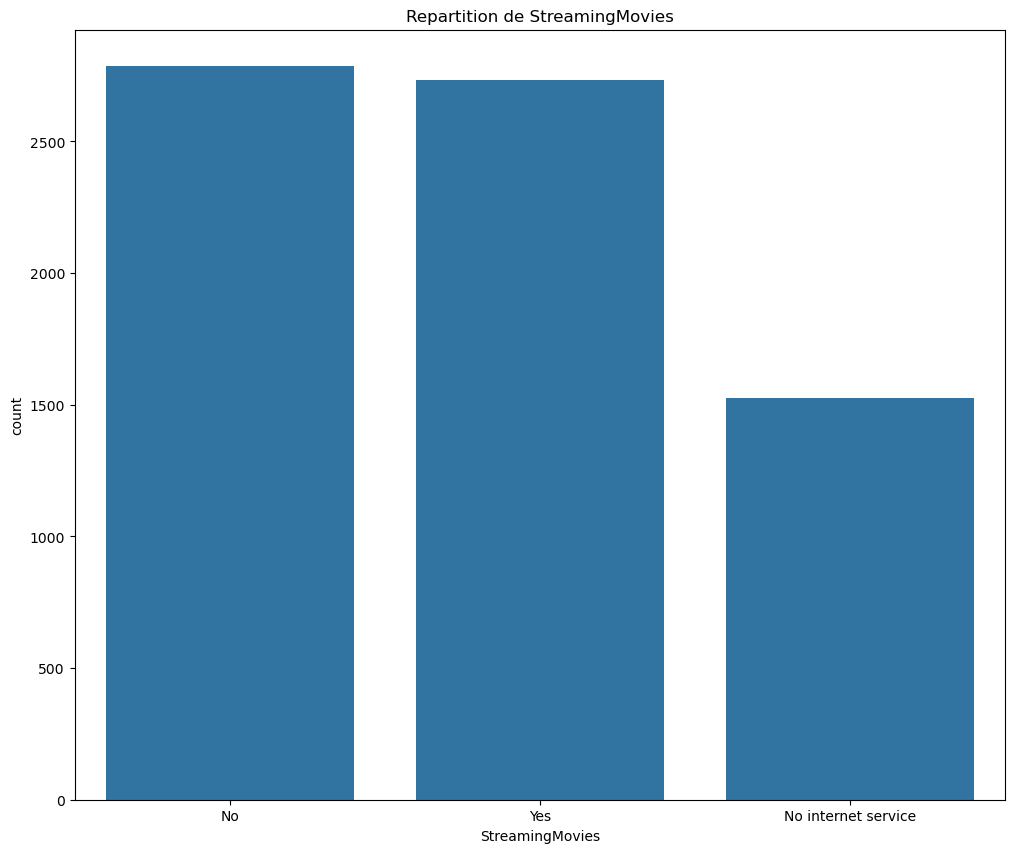

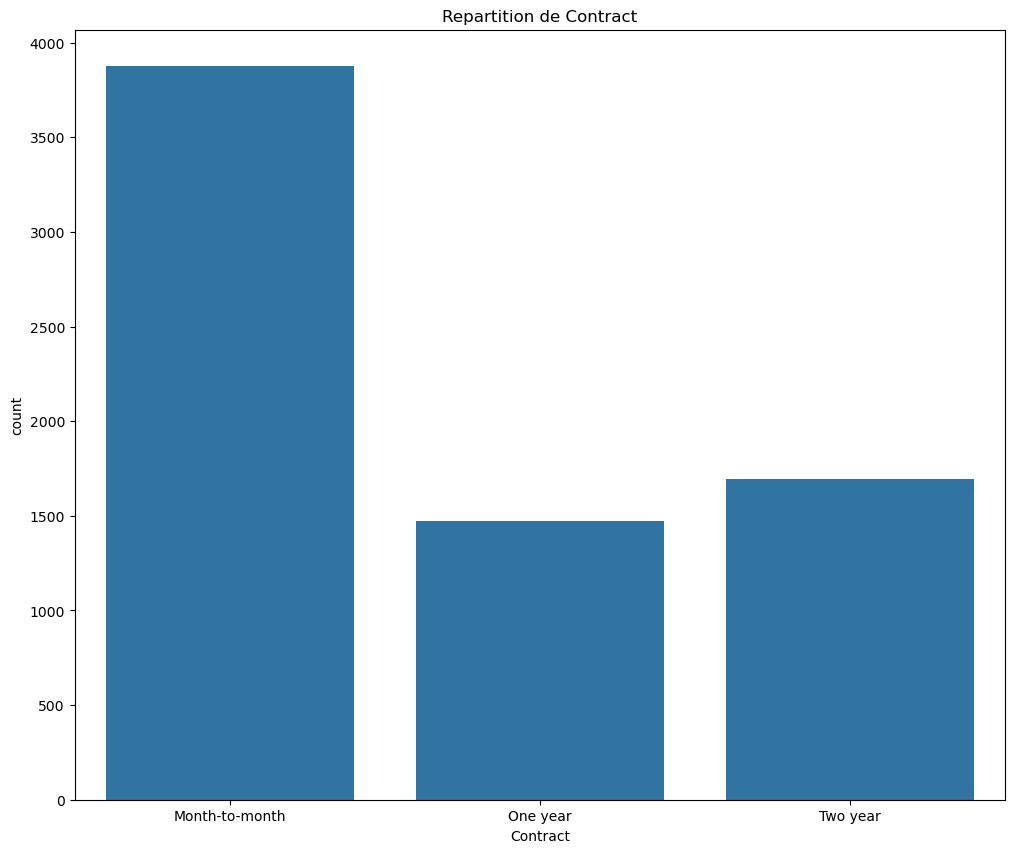

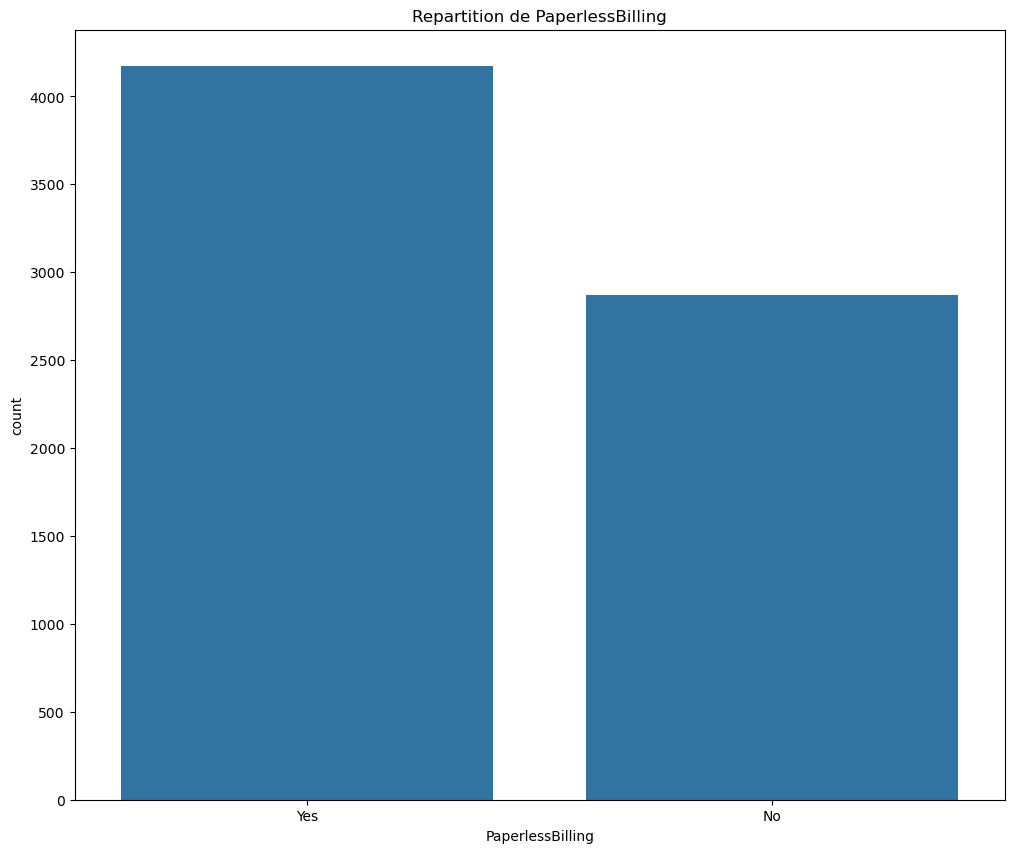

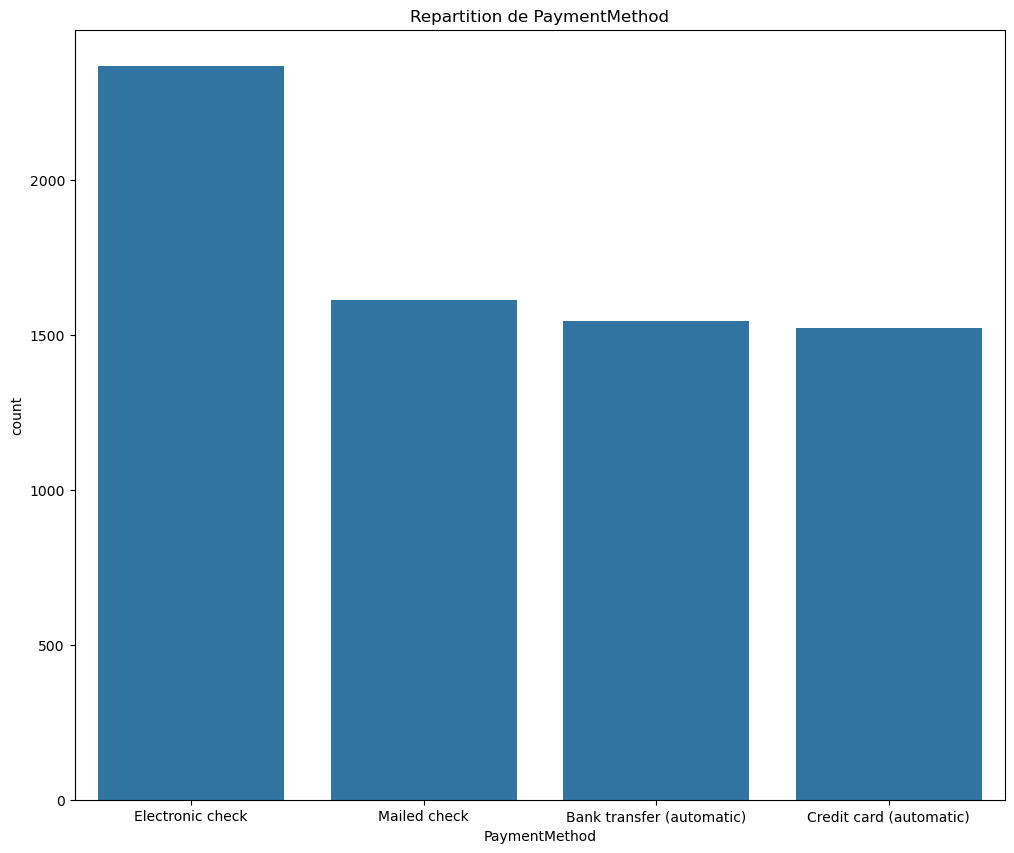

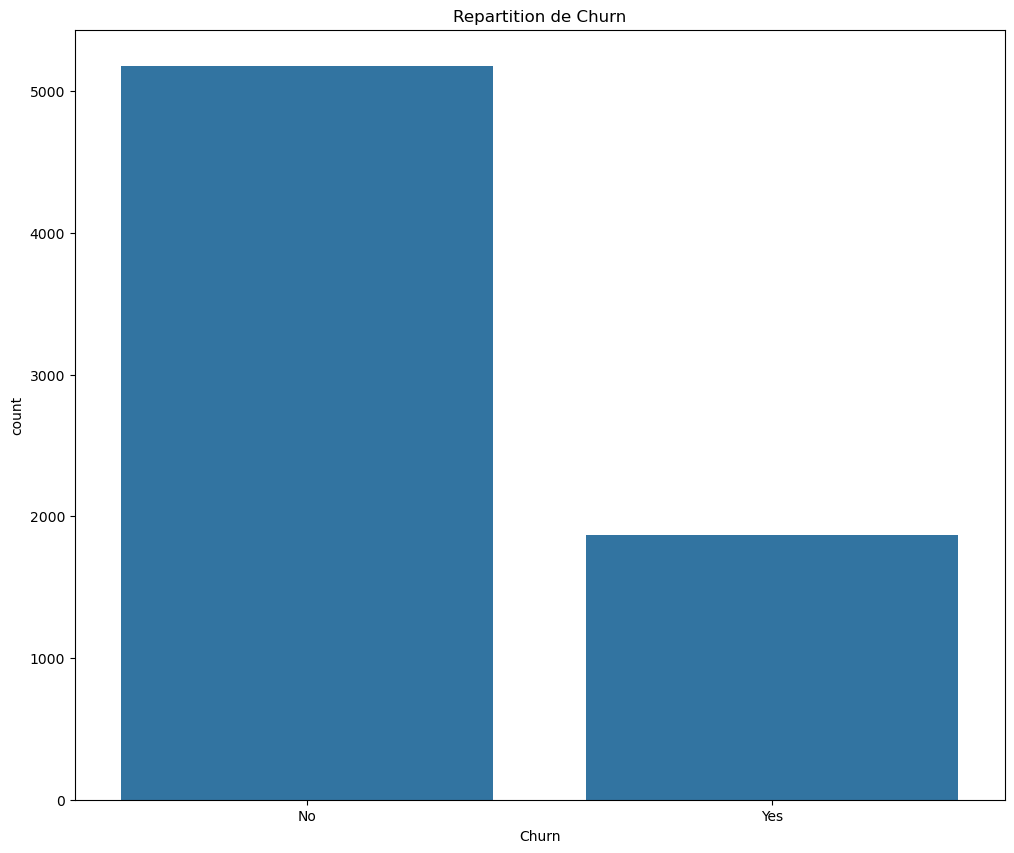

In [14]:
#Distribution  de nos donnees 

#Selectionner les colonnes de types categorielles
object_cols = df.select_dtypes("object").columns.to_list()
object_cols.remove("TotalCharges")
print(object_cols)
for col in object_cols :
    print("-"*100)
    print(f"valeurs uniques sur la colonne <<{col}>>")
    print(df[col].unique(), "\n")

#Distributions des donnees
for col in object_cols :
    plt.figure(figsize = (12,10))
    plt.title(f"Repartition de {col}")
    sns.countplot(data = df, x = df[col])
    plt.show()

In [15]:

def repartition_donnees(data, columns) :
    "Fonction qui donne la proportion des donnees "
    for col in columns :
        print("-"*100)
        print(f"Proportion sur la colonne {col}")
        print(data[col].value_counts() / len(data) * 100)
        print("\n")

repartition_donnees(df, object_cols)
#on observe que notre jeu de donnee n'est pas equilibre

----------------------------------------------------------------------------------------------------
Proportion sur la colonne gender
gender
Male      50.47565
Female    49.52435
Name: count, dtype: float64


----------------------------------------------------------------------------------------------------
Proportion sur la colonne Partner
Partner
No     51.69672
Yes    48.30328
Name: count, dtype: float64


----------------------------------------------------------------------------------------------------
Proportion sur la colonne Dependents
Dependents
No     70.041176
Yes    29.958824
Name: count, dtype: float64


----------------------------------------------------------------------------------------------------
Proportion sur la colonne PhoneService
PhoneService
Yes    90.316626
No      9.683374
Name: count, dtype: float64


----------------------------------------------------------------------------------------------------
Proportion sur la colonne MultipleLines
MultipleLines
N

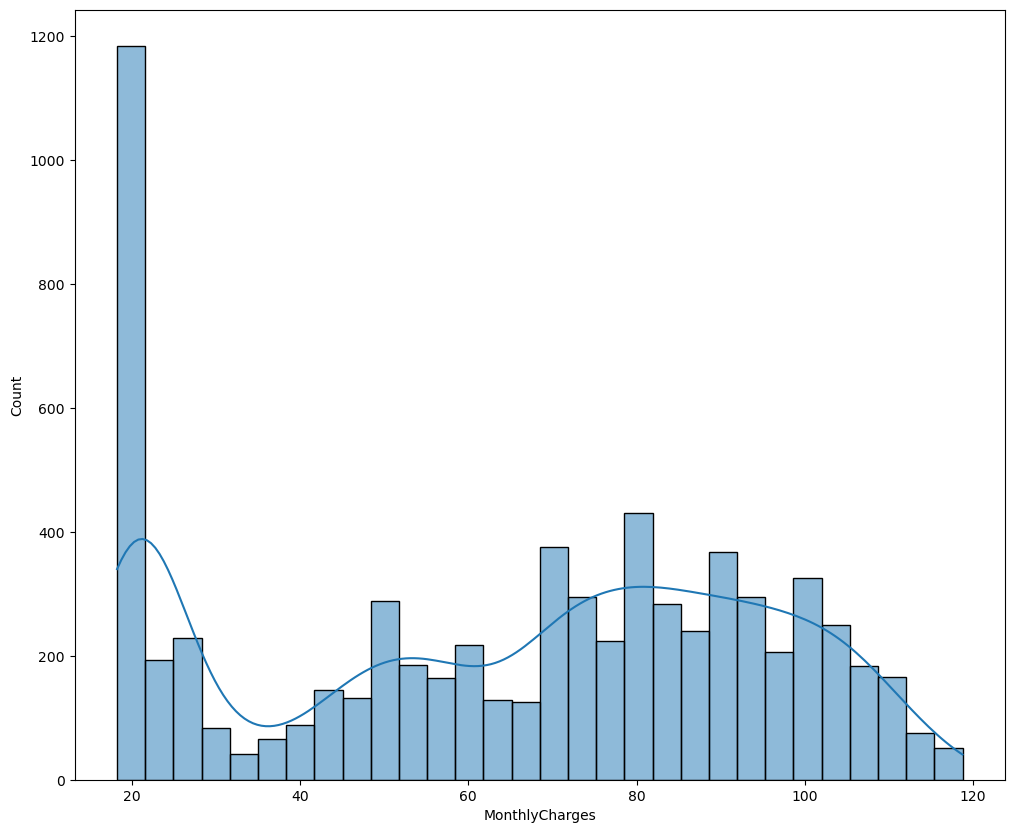

In [16]:
liste_cols = ["MonthlyCharges"]

def distribution_cols(df, liste_cols) :
    for col in liste_cols :
        plt.figure(figsize = (12, 10))
        sns.histplot(data = df, x = col, kde = True, bins = 30)
        plt.show()

distribution_cols(df, liste_cols)

In [17]:
# Une table de contingence permet de voir la distribution croisée de deux variables catégorielles.
pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [18]:
# table de contingence pour les colonnes Contract et Churn
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Figure size 1200x1000 with 0 Axes>

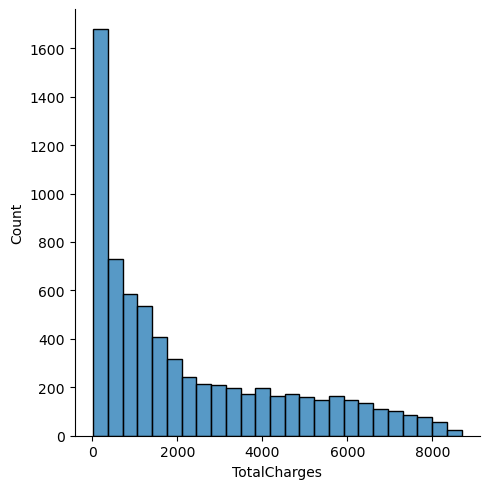

In [19]:
# Pour une colonne spécifique
#df['TotalCharges'] = df['TotalCharges'].str.strip()

# Pour toutes les colonnes du DataFrame
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(df.isnull().sum())
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
print(df.isnull().sum())
plt.figure(figsize = (12, 10))
sns.displot(data = df, x = "TotalCharges")

In [20]:
# Le taux de churn varie-t-il selon l’ancienneté du client ?
pd.crosstab(df["tenure"], df["Churn"], normalize = "index")*100

Churn,No,Yes
tenure,,
0,100.000000,0.000000
1,38.009788,61.990212
2,48.319328,51.680672
3,53.000000,47.000000
4,52.840909,47.159091
...,...,...
68,91.000000,9.000000
69,91.578947,8.421053
70,90.756303,9.243697


In [21]:
type(pd.crosstab(df["MonthlyCharges"], df["Churn"]))

pandas.core.frame.DataFrame

In [22]:
# Les clients ayant des charges mensuelles élevées quittent-ils plus souvent le service ?
np.array((pd.crosstab(df["MonthlyCharges"], df["Churn"])).sort_values(by = "Yes", ascending = False).head(50).index).mean()

74.234

In [23]:
# Les clients ayant des charges mensuelles élevées quittent-ils plus souvent le service ?
np.array((pd.crosstab(df["MonthlyCharges"], df["Churn"], normalize = "index") * 100).sort_values(by = "Yes", ascending = False).head(50).index).mean()

70.47800000000001

In [24]:
# 25.Les contrats mensuels sont-ils plus à risque que les contrats longue durée ? Oui
table_contract_churn =  pd.crosstab(df["Contract"], df["Churn"])
table_contract_churn.reset_index()
table_contract_churn

# Remplace l'index actuel par 0, 1, 2, 3...
# df = df.reset_index(drop=True)

# Garde l'ancien index comme colonne
# df = df.reset_index()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [25]:
# 24.Le type de contrat influence-t-il le taux de churn ?
from scipy import stats
table = pd.crosstab(df["Contract"], df["Churn"])
chi2, p, dof, expected = stats.chi2_contingency(table)
if p < 0.05 :
    print("Le contrat influence sur le taux de churn")
else :
    print("Le contrat n'influence pas sur le taux de churn")

Le contrat influence sur le taux de churn


In [26]:
#26.La méthode de paiement a-t-elle un impact sur le churn ?

def relations_colonnes_categorielles(df, col1, col2) :
    table = pd.crosstab(df[col1], df[col2])
    print("-"*100)
    print(table)
    _, p, _, _ = stats.chi2_contingency(table)
    if p < 0.05 :
        print(f"La variable {col1} influence sur la colonne {col2}")
    else :
        print(f"La variable {col1} n'est pas significvative sur la colonne {col2}")
    print(f"La p_value vaut : {p}\n")

relations_colonnes_categorielles(df, "PaymentMethod", "Churn")


----------------------------------------------------------------------------------------------------
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
La variable PaymentMethod influence sur la colonne Churn
La p_value vaut : 3.6823546520097993e-140



In [27]:
# 28.Le sexe du client a-t-il une influence sur le churn ?
relations_colonnes_categorielles(df, "gender", "Churn")

----------------------------------------------------------------------------------------------------
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
La variable gender n'est pas significvative sur la colonne Churn
La p_value vaut : 0.48657873605618596



In [28]:
# 29.Les clients seniors quittent-ils plus souvent le service ?
relations_colonnes_categorielles(df, "SeniorCitizen", "Churn")
#Les clients senior ne quittent pas souvent plus le service
table = pd.crosstab(df["SeniorCitizen"], df["Churn"])
table.iloc[0,1] <  table.iloc[1,1]

----------------------------------------------------------------------------------------------------
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476
La variable SeniorCitizen influence sur la colonne Churn
La p_value vaut : 1.510066805092378e-36



False

In [29]:
# 30.Les clients ayant un partenaire churnent-ils moins ?
relations_colonnes_categorielles(df, "Partner", "Churn")

----------------------------------------------------------------------------------------------------
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
La variable Partner influence sur la colonne Churn
La p_value vaut : 2.1399113440759935e-36



In [30]:
# 27.La facturation électronique influence-t-elle le comportement des clients ?
relations_colonnes_categorielles(df, "PaperlessBilling", "Churn")

----------------------------------------------------------------------------------------------------
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400
La variable PaperlessBilling influence sur la colonne Churn
La p_value vaut : 4.073354668665985e-58



In [31]:
from scipy.stats import chi2_contingency
object_cols = df.select_dtypes(include = "object").columns
for col1 in object_cols :
    for col2 in object_cols :
        print("-"*100)
        print(f"Test de chi2 sur <{col1}> et <{col2}>")
        table = pd.crosstab(df[col1], df[col2])
        print(pd.crosstab(df[col1], df[col2], normalize='index') * 100)
        chi2, p, dof, expected = chi2_contingency(table)

        print("Chi2 :", chi2)
        print("p-value :", p)
        if p < 0.05 :
            print(f"La colonne {col1} a bel et bien une influence sur {col2}")
        else :
            print(f"La colonne {col1} n'est pas significative sur {col2}")
        print("\n")

----------------------------------------------------------------------------------------------------
Test de chi2 sur <gender> et <gender>
gender  Female   Male
gender               
Female   100.0    0.0
Male       0.0  100.0
Chi2 : 7039.000206021805
p-value : 0.0
La colonne gender a bel et bien une influence sur gender


----------------------------------------------------------------------------------------------------
Test de chi2 sur <gender> et <Partner>
Partner         No        Yes
gender                       
Female   51.605505  48.394495
Male     51.786217  48.213783
Chi2 : 0.016356470128040018
p-value : 0.8982341127357725
La colonne gender n'est pas significative sur Partner


----------------------------------------------------------------------------------------------------
Test de chi2 sur <gender> et <Dependents>
Dependents         No        Yes
gender                          
Female      70.527523  29.472477
Male        69.563994  30.436006
Chi2 : 0.7337079948513788
p

In [32]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
df.dropna(inplace = True)

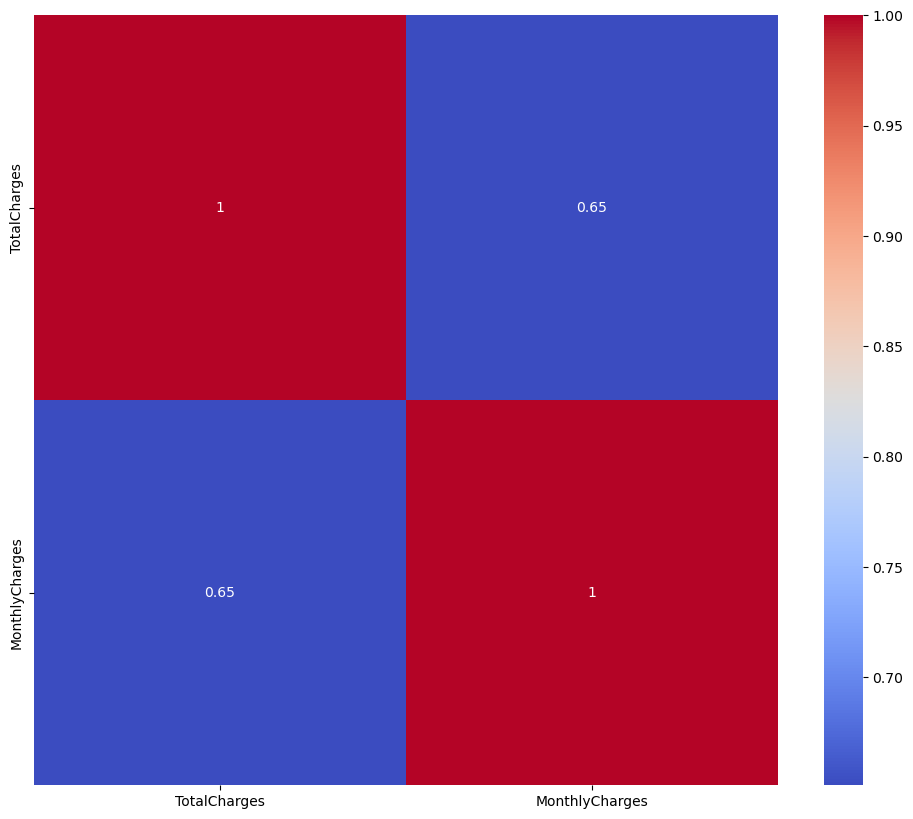

In [34]:
# 36.Les variables financières sont-elles corrélées entre elles ?

cor = df[["TotalCharges", "MonthlyCharges"]].corr()
plt.figure(figsize = (12,10))
sns.heatmap(cor, annot = True, cmap = "coolwarm")
plt.show()
#Les variables financieres sont fortement correlees entre elles

In [35]:
# for i in range(56) : 
#     print(df[["TotalCharges"]].sample(10))

In [36]:
# 37.Peut-on identifier des variables fortement liées au churn ? Oui
cols = df.select_dtypes(include = "object").columns.to_list()[:-1]
result = dict()
def relations_influence_churn(df, cols) : 
    """
    Fonction qui prend en parametre une dataframe et liste de colonne puis etudie la relation entre chaque colonne contenu dans la liste de colonne et 
    la variable cible en utilisant le test de chi2, puis met a jour la variable result en mettant comme cle le nom des colonnes en relation et la p_value
    """
    for col in cols :
        table = pd.crosstab(df[col], df["Churn"])
        print("-"*100)
        print(table)
        _, p, _, _ = stats.chi2_contingency(table)
        if p < 0.05 :
            print(f"La variable {col} influence sur la colonne Churn")
            result[col] = p
        else :
            print(f"La variable {col} n'est pas significvative sur la colonne Churn")
        print(f"La p_value vaut : {p}\n")
        #result[f"{col}_Churn"] = p

relations_influence_churn(df, cols)
print("-"*100,"\nListe des variables fortement correlees avec Churn :")
result

----------------------------------------------------------------------------------------------------
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930
La variable gender n'est pas significvative sur la colonne Churn
La p_value vaut : 0.4904884707065509

----------------------------------------------------------------------------------------------------
Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669
La variable Partner influence sur la colonne Churn
La p_value vaut : 3.97379757451591e-36

----------------------------------------------------------------------------------------------------
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326
La variable Dependents influence sur la colonne Churn
La p_value vaut : 2.0196592017051303e-42

----------------------------------------------------------------------------------------------------
Churn           No   Yes
PhoneService            
No          

{'Partner': 3.97379757451591e-36,
 'Dependents': 2.0196592017051303e-42,
 'MultipleLines': 0.0035679273999811405,
 'InternetService': 5.831198962237274e-159,
 'OnlineSecurity': 1.4006867477839222e-184,
 'OnlineBackup': 7.776099238804965e-131,
 'DeviceProtection': 1.9593887862403176e-121,
 'TechSupport': 7.407807748843711e-180,
 'StreamingTV': 1.324641113169159e-81,
 'StreamingMovies': 5.353560421401324e-82,
 'Contract': 7.326182186265472e-257,
 'PaperlessBilling': 8.236203353962564e-58,
 'PaymentMethod': 1.4263098511063342e-139}

In [37]:
print(f"Il y a <{len(result.values())}> variables qui influence Churn")

Il y a <13> variables qui influence Churn


In [38]:
# 39.Quelles sont les variables les plus importantes pour expliquer le churn ?
print("Les variables categorielles les plus importantes pour expliquer le churn")
for col in result.keys() :
    print(col)

Les variables categorielles les plus importantes pour expliquer le churn
Partner
Dependents
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


In [39]:
# 40.Peut-on identifier un profil type de client à risque ? Oui

In [40]:
# 41.Quelles transformations de données sont nécessaires avant la modélisation ?
# Ici nous devons encoder  nos variables categorielles
#Les variables numeriques doivent etre normalisees

In [65]:
# 42.Quelles variables doivent être encodées ?
#Nous devons encoder Les variables qui influence le plus la colonne Churn
# A savoir : 
# Partner
# Dependents
# MultipleLines
# InternetService
# OnlineSecurity
# OnlineBackup
# DeviceProtection
# TechSupport

# StreamingTV
# StreamingMovies
# Contract
# PaperlessBilling
# PaymentMethod

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

label = LabelEncoder()
df["Churn"] = label.fit_transform(df["Churn"]) #No -> 0, Yes -> 1 

ohe = OneHotEncoder(sparse_output=False, drop = "first", handle_unknown='ignore')
#Colonnes categorielles
categorielle_col = list(result.keys())
#Colonnes numeriques
colonnes_num = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df.copy()
#["Partner", "Dependents", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
X_cat_encoded = ohe.fit_transform(df[categorielle_col])
#Obtenir les noms des colonnes encodees
feature_names = ohe.get_feature_names_out(categorielle_col)
print(feature_names)

# Créer DataFrame
X_cat_df = pd.DataFrame(X_cat_encoded, columns=feature_names, index=X.index)
X_cat_df

# Combiner avec colonnes numériques
X_final = pd.concat([X[colonnes_num].reset_index(drop=True), 
                     X_cat_df.reset_index(drop=True)], axis=1)
X_final

['Partner_Yes' 'Dependents_Yes' 'MultipleLines_No phone service'
 'MultipleLines_Yes' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,1889.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45,42.30,1840.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,72,103.20,7362.90,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,11,29.60,346.45,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,4,74.40,306.60,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [66]:
# # 4. Identifier les colonnes
# colonnes_cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 
#                 'MultipleLines', 'InternetService', 'OnlineSecurity',
#                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                 'StreamingTV', 'StreamingMovies', 'Contract', 
#                 'PaperlessBilling', 'PaymentMethod']

# colonnes_num = ['tenure', 'MonthlyCharges', 'TotalCharges']

# # 5. Séparer X et y
# X = df[colonnes_cat + colonnes_num].copy()
# y = df['Churn']

# # 6. OneHotEncoding
# ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
# X_cat_encoded = ohe.fit_transform(X[colonnes_cat])

# # Récupérer les noms
# feature_names = ohe.get_feature_names_out(colonnes_cat)
# print(feature_names)

# # Créer DataFrame
# X_cat_df = pd.DataFrame(X_cat_encoded, columns=feature_names, index=X.index)

# # Combiner avec colonnes numériques
# X_final = pd.concat([X[colonnes_num].reset_index(drop=True), 
#                      X_cat_df.reset_index(drop=True)], axis=1)
# X_final

['gender_Male' 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
